In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../../'))
sys.path.insert(0, os.path.abspath('../../../'))
sys.path.insert(0, os.path.abspath('../../../../'))

In [2]:
import numpy as np

import qiskit
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import QAOA
from shared.QiskitMaxcut import *

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import networkx as nx
import numpy as np

def generate_butterfly_graph(with_weights=True):
    # Generate a graph of 5 nodes
    n = 5
    graph = nx.Graph()
    graph.add_nodes_from(np.arange(0, n, 1))
    if with_weights:
        elist = [(0, 1, 9), (0, 2, 6), (1, 2, 9), (2, 3, 10), (2, 4, 7), (3, 4, 7)]
    else:
        elist = [(0, 1, 1), (0, 2, 1), (1, 2, 1), (2, 3, 1), (2, 4, 1), (3, 4, 1)]
    graph.add_weighted_edges_from(elist)
    return graph

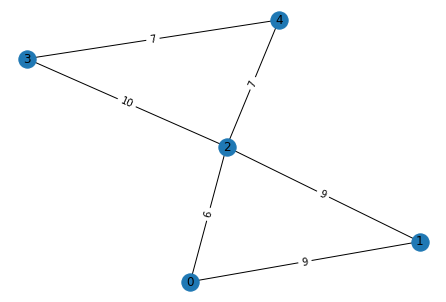

In [4]:
graph = generate_butterfly_graph(with_weights=True)
max_cut = Maxcut(graph)
max_cut_qubo = max_cut.to_qubo()
print(graph.name)
max_cut.draw()

In [5]:
step_size = 0.1
gamma_range = np.arange(0, np.pi, step_size)
beta_range = np.arange(0, np.pi, step_size)

In [6]:
g_gamma, b_beta = np.meshgrid(gamma_range, beta_range)

In [7]:
sim_landscape = np.load('../noise_simulator/landscape_creation_sim_butterfly_weighted_results.npy')

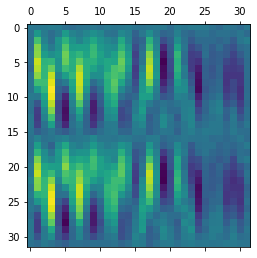

In [8]:
plt.matshow(sim_landscape)
plt.show()

In [9]:
em_landscape = np.load('landscape_creation_qc_butterfly_weighted_spamem_results_2.npy')

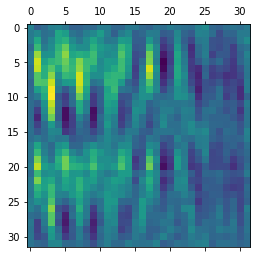

In [10]:
plt.matshow(em_landscape)
plt.show()

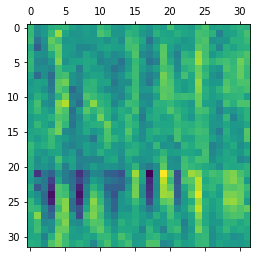

In [11]:
diff_em_landscape = em_landscape - sim_landscape 
plt.matshow(diff_em_landscape)
plt.show()

In [12]:
noise_landscape = np.load('landscape_creation_qc_toronto_butterfly_weighted_results_2.npy')

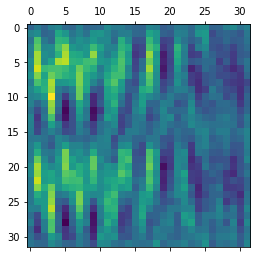

In [13]:
plt.matshow(noise_landscape)
plt.show()

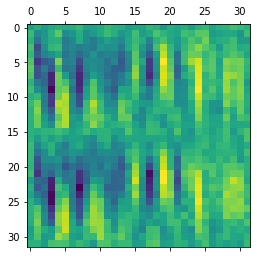

In [14]:
diff_landscape = noise_landscape - sim_landscape 
plt.matshow(diff_landscape)
plt.show()

In [56]:
gem_landscape = np.load('landscape_creation_qc_butterfly_weighted_gem_results_3.npy')

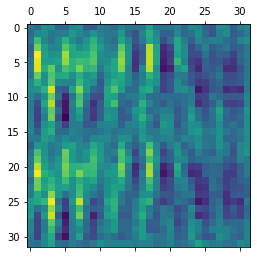

In [57]:
plt.matshow(gem_landscape)
plt.show()

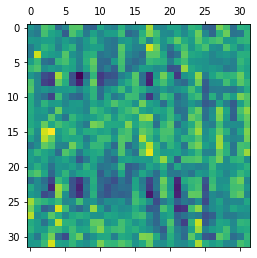

In [58]:
diff_gem_landscape = gem_landscape - sim_landscape
plt.matshow(diff_gem_landscape)
plt.show()

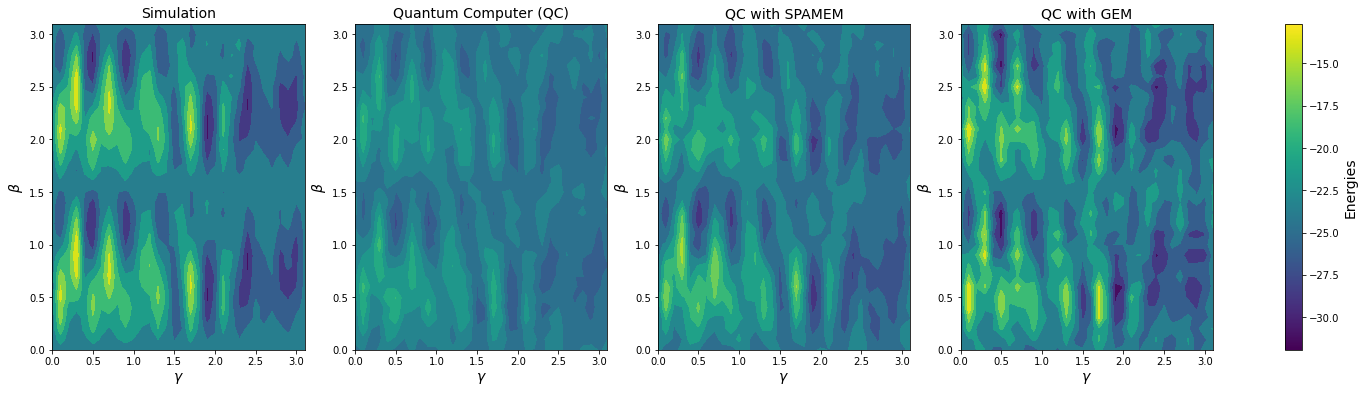

In [59]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm

font_size = 14
fig, ax = plt.subplots(1,4, figsize=(26,6))

cmap = cm.get_cmap('viridis')
minv = np.min([sim_landscape, noise_landscape, em_landscape, gem_landscape])
maxv = np.max([sim_landscape, noise_landscape, em_landscape, gem_landscape])
normalizer=Normalize(minv,maxv)
im=cm.ScalarMappable(norm=normalizer)

plot = ax[0].contourf(gamma_range, beta_range, sim_landscape, cmap = cmap, norm=normalizer)
ax[0].set_ylabel(r'$\beta$', fontsize = font_size)
ax[0].set_xlabel(r'$\gamma$', fontsize = font_size)
ax[0].set_title('Simulation', fontsize = font_size)

# noise 
plot = ax[1].contourf(gamma_range, beta_range, noise_landscape, cmap = cmap, norm=normalizer)
ax[1].set_ylabel(r'$\beta$', fontsize = font_size)
ax[1].set_xlabel(r'$\gamma$', fontsize = font_size)
ax[1].set_title('Quantum Computer (QC)', fontsize = font_size)

# em
plot = ax[2].contourf(gamma_range, beta_range, em_landscape, cmap = cmap, norm=normalizer)
ax[2].set_ylabel(r'$\beta$', fontsize = font_size)
ax[2].set_xlabel(r'$\gamma$', fontsize = font_size)
ax[2].set_title('QC with SPAMEM', fontsize = font_size)

# gem 
plot = ax[3].contourf(gamma_range, beta_range, gem_landscape, cmap = cmap, norm=normalizer)
ax[3].set_ylabel(r'$\beta$', fontsize = font_size)
ax[3].set_xlabel(r'$\gamma$', fontsize = font_size)
ax[3].set_title('QC with GEM', fontsize = font_size)

colorbar = plt.colorbar(im, ax=ax)
colorbar.ax.set_ylabel('Energies', fontsize = font_size)
plt.show()

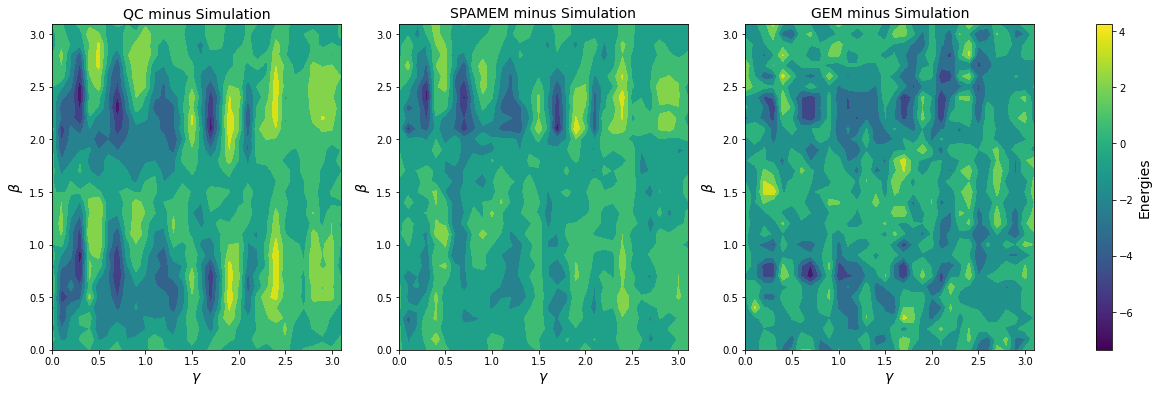

In [60]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm

font_size = 14
fig, ax = plt.subplots(1,3, figsize=(22,6))

cmap = cm.get_cmap('viridis')
minv = np.min([diff_landscape, diff_gem_landscape, diff_em_landscape])
maxv = np.max([diff_landscape, diff_gem_landscape, diff_em_landscape])
normalizer=Normalize(minv,maxv)
im=cm.ScalarMappable(norm=normalizer)

# diffrenz: noise - sim  
plot = ax[0].contourf(gamma_range, beta_range, diff_landscape, cmap = cmap)
ax[0].set_ylabel(r'$\beta$', fontsize = font_size)
ax[0].set_xlabel(r'$\gamma$', fontsize = font_size)
ax[0].set_title('QC minus Simulation', fontsize = font_size)

# diffrenz: em - noise  
plot = ax[1].contourf(gamma_range, beta_range, diff_em_landscape, cmap = cmap)
ax[1].set_ylabel(r'$\beta$', fontsize = font_size)
ax[1].set_xlabel(r'$\gamma$', fontsize = font_size)
ax[1].set_title('SPAMEM minus Simulation', fontsize = font_size)

# diffrenz: gem - sim  
plot = ax[2].contourf(gamma_range, beta_range, diff_gem_landscape, cmap = cmap)
ax[2].set_ylabel(r'$\beta$', fontsize = font_size)
ax[2].set_xlabel(r'$\gamma$', fontsize = font_size)
ax[2].set_title('GEM minus Simulation', fontsize = font_size)

colorbar = plt.colorbar(im, ax=ax)
colorbar.ax.set_ylabel('Energies', fontsize = font_size)
plt.show()

In [127]:
np.mean((diff_landscape))

-0.4548664093017578

In [128]:
np.mean((diff_em_landscape))

-0.4592552696680247

In [129]:
np.mean((diff_gem_landscape))

-0.3263379349413683

In [64]:
np.min(gem_landscape)

-31.926794554023438

In [65]:
np.min(em_landscape)

-29.79689649708206

In [66]:
np.min(noise_landscape)

-27.611328125

In [67]:
np.min(sim_landscape)

-31.0078125

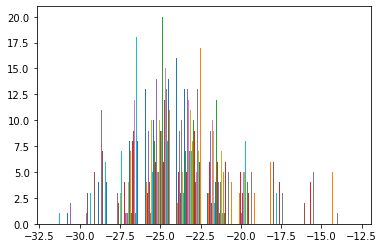

In [83]:
plt.hist(gem_landscape)
plt.show()

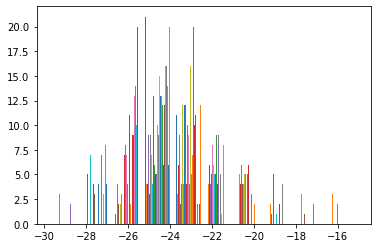

In [84]:
plt.hist(em_landscape)
plt.show()

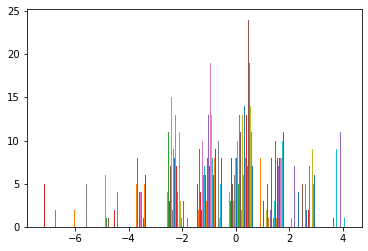

In [79]:
plt.hist(diff_landscape)
plt.show()

In [130]:
sorted(gem_landscape.flatten())[:20]

[-31.926794554023438,
 -31.243929404861916,
 -31.03844950914841,
 -31.019184920769558,
 -30.910598521622987,
 -30.875729053670984,
 -30.86302462122968,
 -30.728381649944634,
 -30.71524540656695,
 -30.460131801044255,
 -30.256108791003886,
 -30.2121465099824,
 -30.154597879839542,
 -30.02497890909603,
 -30.01105447587509,
 -29.85875000466623,
 -29.75228694187805,
 -29.714757953650334,
 -29.6824555560381,
 -29.600666299046317]

In [131]:
sorted(sim_landscape.flatten())[:20]

[-31.0078125,
 -30.9541015625,
 -30.8076171875,
 -30.8037109375,
 -30.6416015625,
 -30.6142578125,
 -30.45703125,
 -30.4501953125,
 -30.400390625,
 -30.3056640625,
 -30.236328125,
 -30.2333984375,
 -30.1845703125,
 -30.1142578125,
 -30.095703125,
 -30.0498046875,
 -29.87890625,
 -29.7626953125,
 -29.7607421875,
 -29.7294921875]

In [118]:
sorted(em_landscape.flatten())[:10]

[-29.79689649708206,
 -29.48098939818876,
 -29.266135811443164,
 -29.262314879493413,
 -29.255975666073333,
 -29.253145763553157,
 -29.031359411524775,
 -28.730963802320595,
 -28.724514146926577,
 -28.498486145021918]

In [96]:
sorted(noise_landscape.flatten())[:10]

[-27.611328125,
 -27.435546875,
 -27.3271484375,
 -27.2802734375,
 -27.171875,
 -27.1630859375,
 -27.109375,
 -27.0908203125,
 -27.04296875,
 -27.037109375]

In [98]:
np.array(sorted(gem_landscape.flatten())[:10]) - np.array(sorted(em_landscape.flatten())[:10])

array([-2.12989806, -1.76294001, -1.7723137 , -1.75687004, -1.65462286,
       -1.62258329, -1.83166521, -1.99741785, -1.99073126, -1.96164566])

In [105]:
np.median(sim_landscape)

-23.89111328125

In [106]:
np.median(gem_landscape)

-23.93679123714758

In [107]:
np.median(em_landscape)

-24.15748067681041

In [108]:
np.median(noise_landscape)

-24.041015625